# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. `Numpy`, `matplotlib`, `scipy.stats`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.

**Баллы за задание:**

<font color="blue"><b>Легкая часть</b></font> (достаточно на "хор"):
* Задача 1.1 — 3 балла
* Задача 1.2 — 3 балла
* Задача 2 — 3 балла

<font color="orange"><b>Сложная часть</b></font> (необходимо на "отл"):
* Задача 1.3 — 3 балла
* Задача 3.1 — 3 балла
* Задача 3.2 — 3 балла
* Задача 3.3 — 3 балла
* Задача 4 — 4 балла


In [10]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

### <font color="blue"><i>Легкая часть: генерация</i></font>

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [16]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета

#распределение Бернулли (в нашем случае монеткой) - это частный случай биномиального распределения при n = 1
coin = sps.binom(1, 0.5).rvs

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [17]:
coin(10)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

In [261]:
def uniform(size=1, precision=30):
    pow2 = 0.5 ** (np.arange(precision) + 1)
    coin_random = coin(np.append(size, precision))
    return (pow2 * coin_random).sum(axis=-1)

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

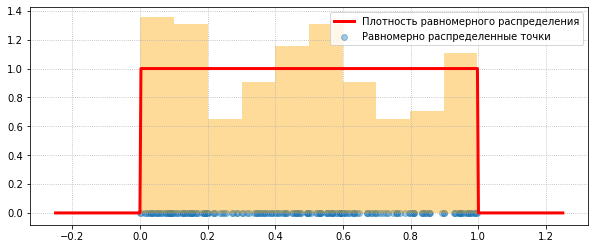

In [22]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, 50)

plt.figure(figsize = (10, 4))
plt.scatter(sample, np.zeros(size), alpha = 0.4, label = 'Равномерно распределенные точки')
plt.hist(sample, bins = 10, density = True, alpha = 0.4, color = 'orange')
plt.plot(grid, sps.uniform.pdf(grid), color = 'red', lw = 3, label = 'Плотность равномерного распределения')
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

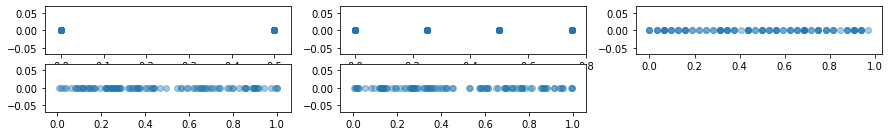

In [406]:
size = 100

plt.figure(figsize = (15, 3))

for i, precision in enumerate([1, 2, 5, 10, 50]):
    plt.subplot(3, 3, i + 1)
    plt.scatter(uniform(size, precision), np.zeros(size), alpha = 0.4)

plt.show()

**Вывод:**

Мы моделируем равномерное распределение с помощью распределения Бернулли путем представлений случайной величины в двоичной записи, каждый разряд которого представляет из себя случайную величину с имеющимся у нас распределением (орел/решка монетки). Мы построили постройте график плотности на отрезке и гистограмму по сгенерированным случайным величинам. На данных видно, что полученная плотность распределения совпадает с теоретической плотностью равномерного распределения. Также мы меняли `precision` и на практике видно, что чем больше `precision`, тем случайные величины более равномерно распределены по отрезку.

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [29]:
def normal(size=1, loc=0, scale=1, precision=30):
    x = uniform(size, precision)
    y = uniform(size, precision)
    u = np.cos(2 * np.pi * x) * np.sqrt(-2 * np.log(y))
    return loc + scale * u

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

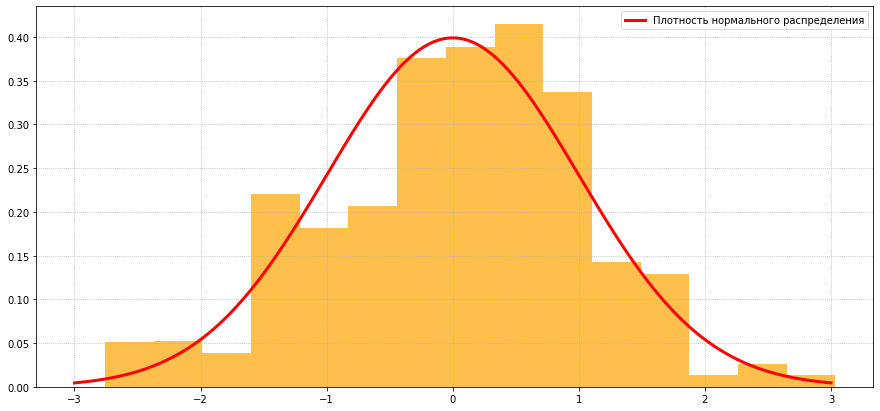

In [95]:
size = 200
grid = np.linspace(-3, 3, 2000)
sample = normal(size)

sample

plt.figure(figsize = (15, 7))
plt.hist(sample, bins = 15, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.norm.pdf(grid), color = 'red', lw = 3, label = 'Плотность нормального распределения')
plt.legend()
plt.grid(ls=':')
plt.show()

### <font color="orange"><i>Сложная часть: генерация</i></font>

**Часть 3.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя задачу из теории вероятностей:

*Если $\xi$ — случайная величина, имеющая абсолютно непрерывное распределение, и $F$ — ее функция распределения, то случайная величина $F(\xi)$ имеет равномерное распределение на $[0, 1]$*.

Какое преобразование над равномерной случайной величиной необходимо совершить? Поясните ответ.

Из данного утверждения следует: если случайная величина $\xi$ имеет равномерное распределение на $[0, 1$], то $F^{-1}(\xi)$ также является случайной величиной с функцией распределения $F(x)$. Функция распределения экспоненциального распределения $F(x) = 1 - e^{-\lambda x}$ при $x \geq 0$, значит $F^{-1}(x) = -\frac{\ln{(1-x)}}{\lambda}$.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [82]:
def expon(size=1, lambd=1, precision=30):
    return - np.log(1 - uniform(size, precision)) / lambd

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

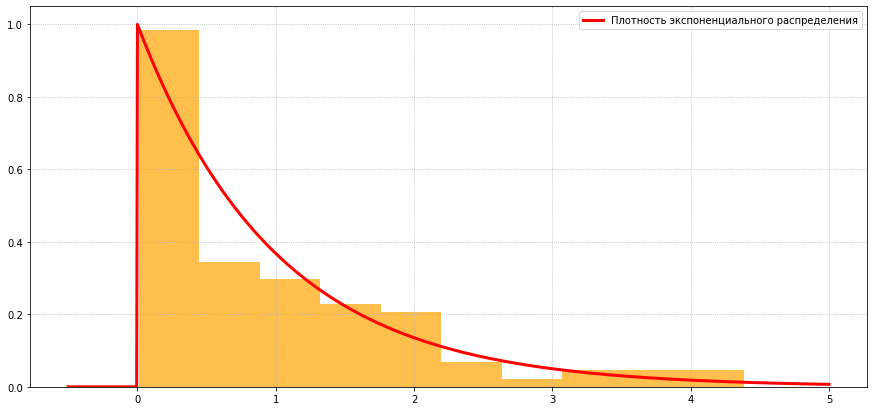

In [128]:
size = 100
grid = np.linspace(-0.5, 5, 1000)
sample = expon(size)

plt.figure(figsize = (15, 7))
plt.hist(sample, bins = 10, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.expon.pdf(grid), lw = 3, color = 'red', label = 'Плотность экспоненциального распределения')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод по задаче:**

Имея равномерное на $[0, 1]$ распределение, можно генерировать любое распределение при условии, что функция $F(x)$ этого распределения обратима, то есть явно выражена $F^{-1}(x)$. Мы это показали на примере экспоненциального распределения.

### <font color="blue"><i>Легкая часть: матричное умножение</i></font>

### Задача 2
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [107]:
def matrix_multiplication(A, B):  
    D = np.zeros((A.shape[0], B.shape[1], A.shape[1]))
    for i in range(A.shape[0]):
        D[i] = A[i] * B.T
    return D.sum(axis=2)

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [108]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

1.4455103780619538e-13

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [109]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [110]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B) 

CPU times: user 116 ms, sys: 75.3 ms, total: 192 ms
Wall time: 281 ms
CPU times: user 1.75 ms, sys: 407 µs, total: 2.15 ms
Wall time: 1.1 ms
CPU times: user 4.02 ms, sys: 1.36 ms, total: 5.38 ms
Wall time: 2.98 ms
CPU times: user 19.5 s, sys: 91.5 ms, total: 19.6 s
Wall time: 19.6 s
CPU times: user 8.84 ms, sys: 674 µs, total: 9.51 ms
Wall time: 9.2 ms


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [112]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))
    
    D = np.zeros((A.shape[0], B.shape[1], A.shape[1]))
    for i in range(A.shape[0]):
        D[i] = A[i] * B.T
        
    C = D.sum(axis=2)
    
    return C

### <font color="orange"><i>Сложная часть: броуновское движение</i></font>

### Задача 3

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [312]:
def brownian(sigma, T, interval_cnt, dim, particle_cnt):
    delta_t = T / interval_cnt
    return sps.norm(loc=0, scale=sigma*np.sqrt(delta_t)).rvs((particle_cnt, dim, interval_cnt)).cumsum(axis=2)


array([[[ 1.26067824,  0.95849803,  0.58738968, -0.45992124,
          0.55763925,  1.90083177,  3.60502459,  4.20617562,
          4.28861658,  4.26622333],
        [ 0.53543354,  1.08079389,  1.1870686 ,  0.09190856,
         -1.02541385, -2.0031755 , -1.91890699, -4.06277202,
         -5.39627944, -6.14513935]]])

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

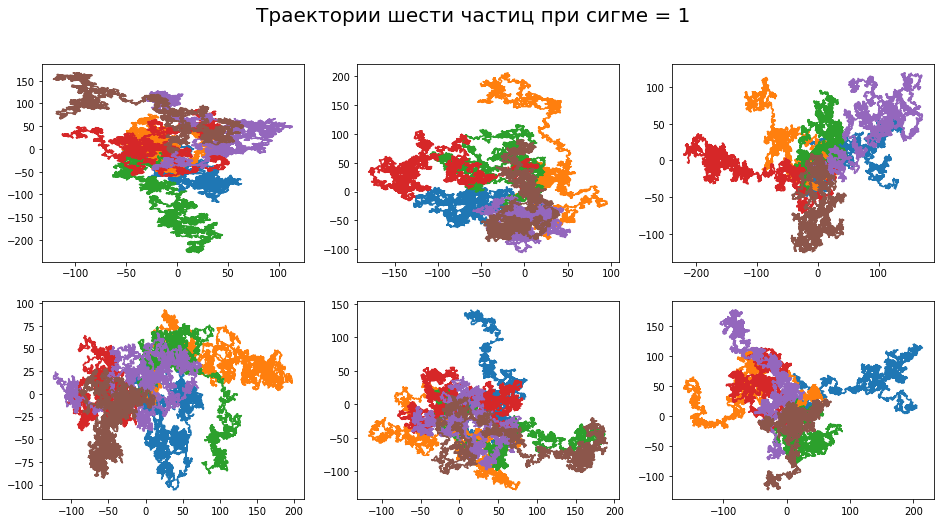

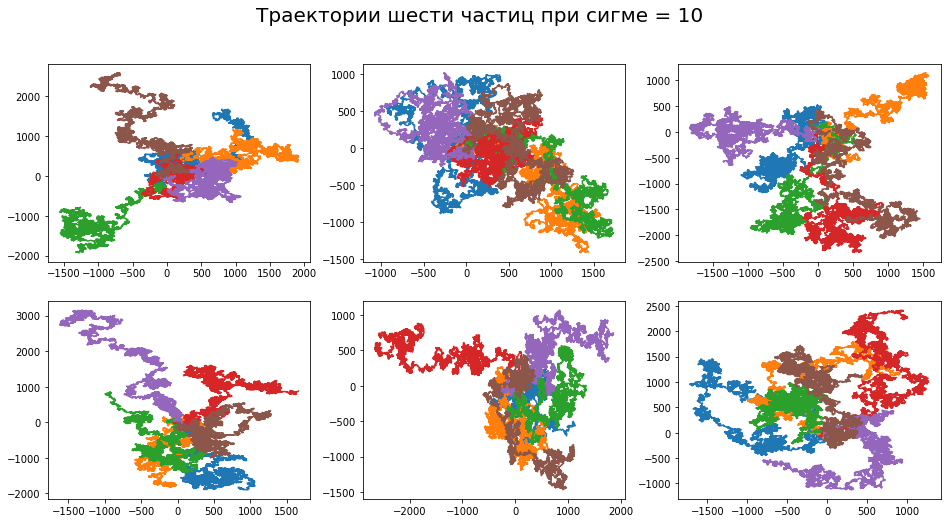

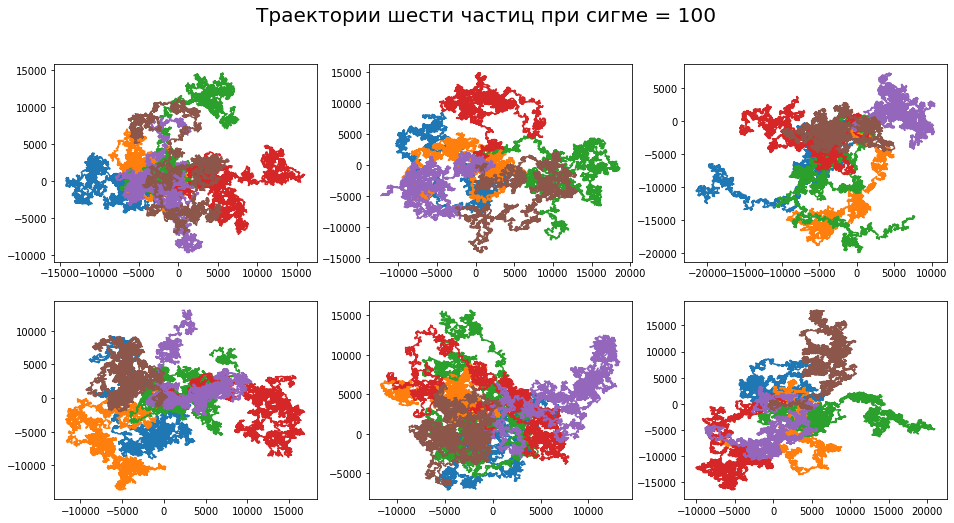

In [347]:
sigma = 1

def plot_brownian(sigma):
    fig, axes = plt.subplots(2, 3, figsize=(16, 8))
    fig.suptitle('Траектории шести частиц при сигме = ' + str(sigma), fontsize=20)
    for ax in axes.flat:
        brownian_2d = brownian(sigma=sigma, T=10000, interval_cnt=10000, dim=2, particle_cnt=6)
        for (x, y) in brownian_2d:
            ax.plot(x, y)

plot_brownian(1)
plot_brownian(10)
plot_brownian(100)

Как вид траектории зависит от $\sigma$?

* Вывод: Чем больше $\sigma$, тем больше диапозон разброса частицы (то есть в каком-то смысле менее ограниченный по движению)

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

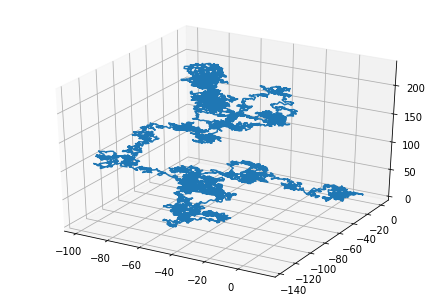

In [350]:
fig = plt.figure()
ax = Axes3D(fig)
sigma = 1
brownian_3d = brownian(sigma=sigma, T=10000, interval_cnt=10000, dim=3, particle_cnt=1)
for (x, y, z) in brownian_3d:
    ax.plot(x, y, z)

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

**Исследование:**
Сначала проведем исследование в двухмерном пространстве. Будем работать только с одной частицей. При разных значениях сигма будем генерировать массив расстояний до начала координат и строить график зависимости расстояния от времени (количества прошедших интервалов).

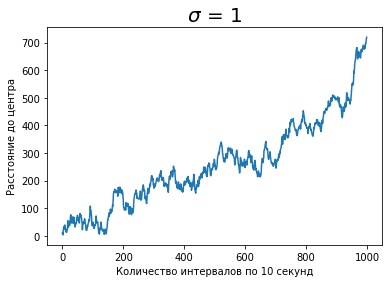

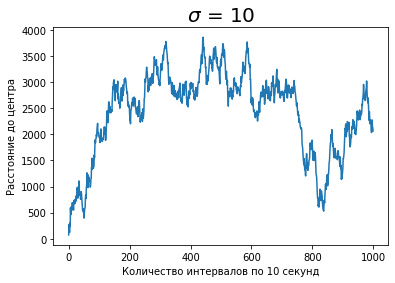

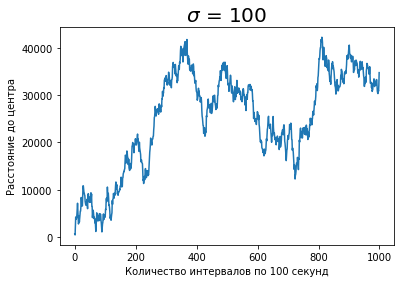

In [397]:
sigma = 1
brownian_2d = brownian(sigma=sigma, T=100000, interval_cnt=1000, dim=2, particle_cnt=1)
x = brownian_2d[0][0]
y = brownian_2d[0][1]
dist = np.sqrt(x**2 + y**2)
plt.figure()
plt.plot(dist)
plt.title('$\sigma$ = ' + str(sigma), fontsize=20)
plt.xlabel('Количество интервалов по 100 секунд')
plt.ylabel('Расстояние до центра')
plt.show()

sigma = 10
brownian_2d = brownian(sigma=sigma, T=100000, interval_cnt=1000, dim=2, particle_cnt=1)
x = brownian_2d[0][0]
y = brownian_2d[0][1]
dist = np.sqrt(x**2 + y**2)
plt.figure()
plt.plot(dist)
plt.title('$\sigma$ = ' + str(sigma), fontsize=20)
plt.xlabel('Количество интервалов по 100 секунд')
plt.ylabel('Расстояние до центра')
plt.show()


sigma = 100
brownian_2d = brownian(sigma=sigma, T=100000, interval_cnt=1000, dim=2, particle_cnt=1)
x = brownian_2d[0][0]
y = brownian_2d[0][1]
dist = np.sqrt(x**2 + y**2)
plt.figure()
plt.plot(dist)
plt.title('$\sigma$ = ' + str(sigma), fontsize=20)
plt.xlabel('Количество интервалов по 100 секунд')
plt.ylabel('Расстояние до центра')
plt.show()


* Вывод:
Во-первых, при фиксированном $sigma$ расстояние до центра в целом увеличивается. Во-вторых, как уже было показано выше, чем больше $sigma$, тем больший разброс имеет диапозон, то есть тем больше расстояние до центра. 

Аналогично рассмотрим и движение в пространстве.

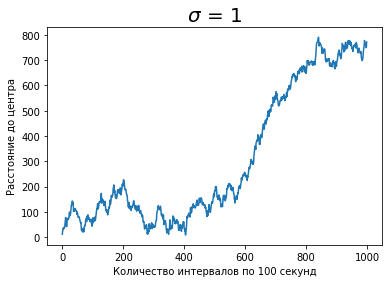

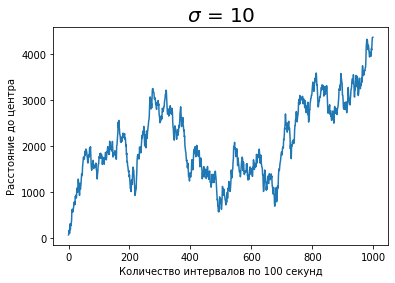

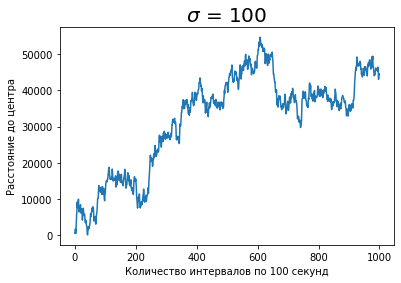

In [399]:
sigma = 1
brownian_3d = brownian(sigma=sigma, T=100000, interval_cnt=1000, dim=3, particle_cnt=1)
x = brownian_3d[0][0]
y = brownian_3d[0][1]
z = brownian_3d[0][2]
dist = np.sqrt(x**2 + y**2)
plt.figure()
plt.plot(dist)
plt.title('$\sigma$ = ' + str(sigma), fontsize=20)
plt.xlabel('Количество интервалов по 100 секунд')
plt.ylabel('Расстояние до центра')
plt.show()

sigma = 10
brownian_3d = brownian(sigma=sigma, T=100000, interval_cnt=1000, dim=3, particle_cnt=1)
x = brownian_3d[0][0]
y = brownian_3d[0][1]
z = brownian_3d[0][2]
dist = np.sqrt(x**2 + y**2)
plt.figure()
plt.plot(dist)
plt.title('$\sigma$ = ' + str(sigma), fontsize=20)
plt.xlabel('Количество интервалов по 100 секунд')
plt.ylabel('Расстояние до центра')
plt.show()

sigma = 100
brownian_3d = brownian(sigma=sigma, T=100000, interval_cnt=1000, dim=3, particle_cnt=1)
x = brownian_3d[0][0]
y = brownian_3d[0][1]
z = brownian_3d[0][2]
dist = np.sqrt(x**2 + y**2)
plt.figure()
plt.plot(dist)
plt.title('$\sigma$ = ' + str(sigma), fontsize=20)
plt.xlabel('Количество интервалов по 100 секунд')
plt.ylabel('Расстояние до центра')
plt.show()

Получаем аналогичные рассуждения.

### <font color="orange"><i>Сложная часть: визуализация распределений</i></font>

### Задача 4

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1. На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2. Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3. Сделать выводы о свойтсвах параметров каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Дискретное равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. Можно использовать функции из `scipy`. Сделать виджеты недостаточно, поскольку они не сохраняются.

*Так как даны дискретные распределения, то я буду строить отдельные графики при разных параметрах, поскольку плотности ненулевые лишь в счетном числе точек: графики накладываются друг на друга, они получаются нечитабельными.*

**Распределение Бернулли:**
Поскольку случайная величина в этом случае принимает лишь 1 или 0, то построим отдельные графики для разных параметров.

In [277]:
size = 500
grid = np.linspace(-0.5, 1.5, 1001)
p = 0.2
sample = sps.bernoulli(p=p).rvs(size)


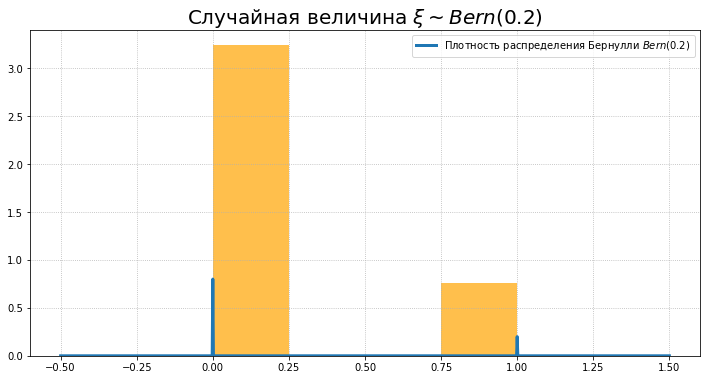

In [278]:
plt.figure(figsize = (12, 6))
plt.hist(sample, bins = 4, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.bernoulli(p=p).pmf(grid), lw = 3, label = 'Плотность распределения Бернулли $Bern$' + '$({})$'.format(p))
plt.title(r'Случайная величина $\xi \sim Bern({})$'.format(p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

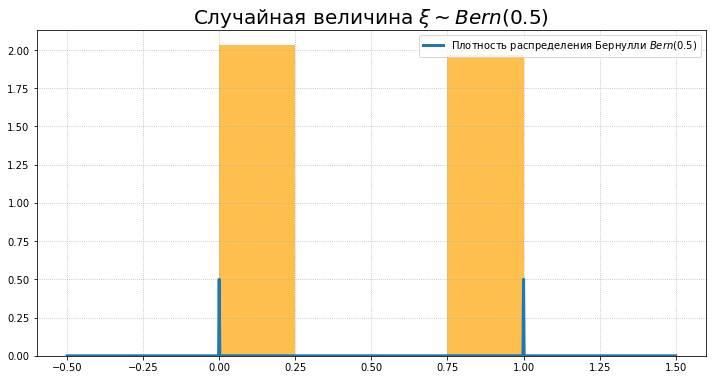

In [279]:
p = 0.5
sample = sps.bernoulli(p=p).rvs(size)

plt.figure(figsize = (12, 6))
plt.hist(sample, bins = 4, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.bernoulli(p=p).pmf(grid), lw = 3, label = 'Плотность распределения Бернулли $Bern$' + '$({})$'.format(p))
plt.title(r'Случайная величина $\xi \sim Bern({})$'.format(p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

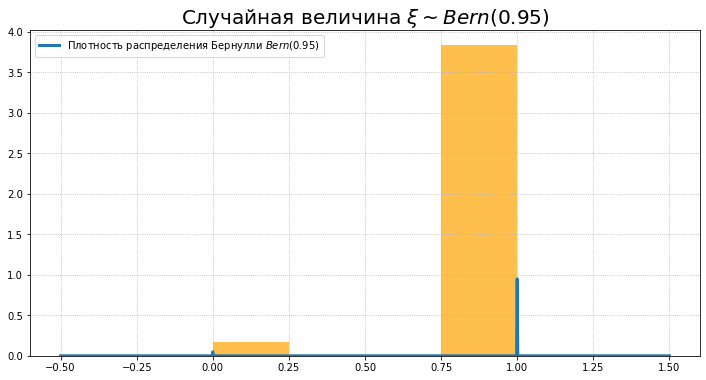

In [280]:
p = 0.95
sample = sps.bernoulli(p=p).rvs(size)

plt.figure(figsize = (12, 6))
plt.hist(sample, bins = 4, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.bernoulli(p=p).pmf(grid), lw = 3, label = 'Плотность распределения Бернулли $Bern$' + '$({})$'.format(p))
plt.title(r'Случайная величина $\xi \sim Bern({})$'.format(p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

* Вывод:
Распределение Бернулли очень простое, его плотность ненулевая только в точках $0$ и $1$, значения в которых соотносятся друг к другу в отношении $\frac{1 - p}{p}$. Именно за это и отвечает параметр $p$.

**Биномиальное распределение**:
Случайная величина принимает значения целых цисел $[0, n]$, поэтому построим отдельные графики.
Сначала зафиксируем параметр $n$, будем менять $p$.

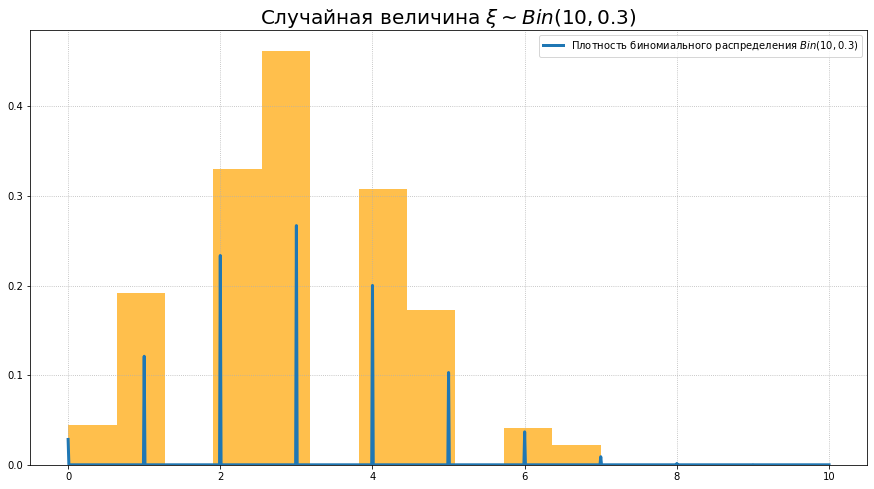

In [281]:
size = 500
n = 10
grid = np.linspace(0, n, 100 * n + 1)
p = 0.3
sample = sps.binom(n=n, p=p).rvs(size)




plt.figure(figsize = (15, 8))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.binom(n=n,p=p).pmf(grid), lw = 3, label = 'Плотность биномиального распределения $Bin$' + '$({},{})$'.format(n, p))
plt.title(r'Случайная величина $\xi \sim Bin({},{})$'.format(n, p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

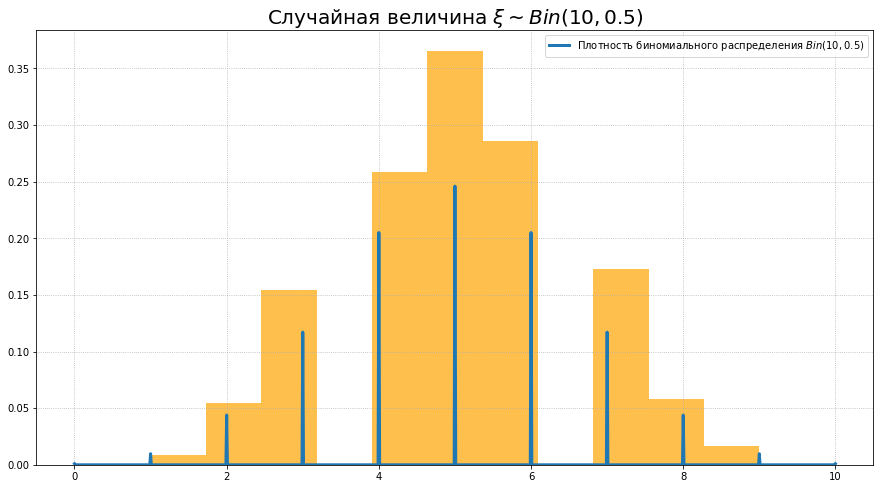

In [282]:
p = 0.5
sample = sps.binom(n=n, p=p).rvs(size)


plt.figure(figsize = (15, 8))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.binom(n=n,p=p).pmf(grid), lw = 3, label = 'Плотность биномиального распределения $Bin$' + '$({},{})$'.format(n, p))
plt.title(r'Случайная величина $\xi \sim Bin({},{})$'.format(n, p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

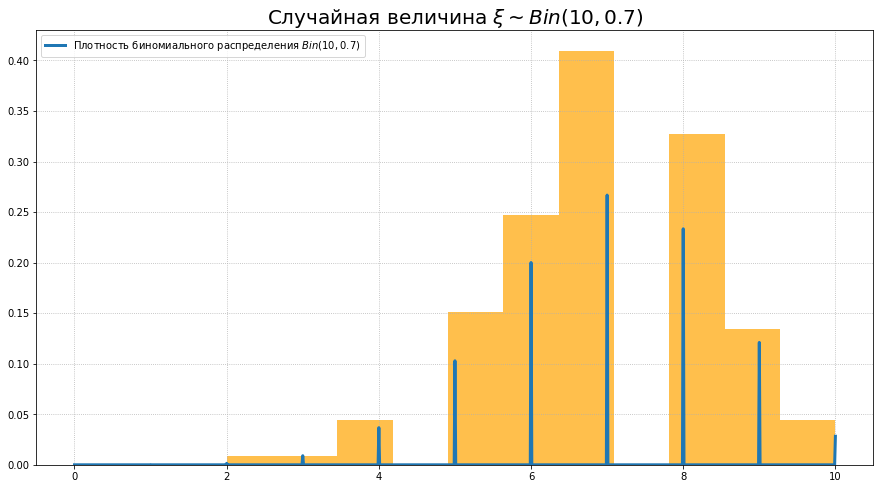

In [283]:
p = 0.7
sample = sps.binom(n=n, p=p).rvs(size)


plt.figure(figsize = (15, 8))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.binom(n=n,p=p).pmf(grid), lw = 3, label = 'Плотность биномиального распределения $Bin$' + '$({},{})$'.format(n, p))
plt.title(r'Случайная величина $\xi \sim Bin({},{})$'.format(n, p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

* Вывод:
Параметр $p$ отвечает за сдвиг графика плотности вдоль оси $Ox$. Чем больше $p$, тем визуально "правее" график плотности. Это логично, поскольку, чем больше вероятность успеха одного испытания, тем больше успехов из $n$ испытаний мы будем иметь.

Зафиксируем $p$, будем менять $n$.

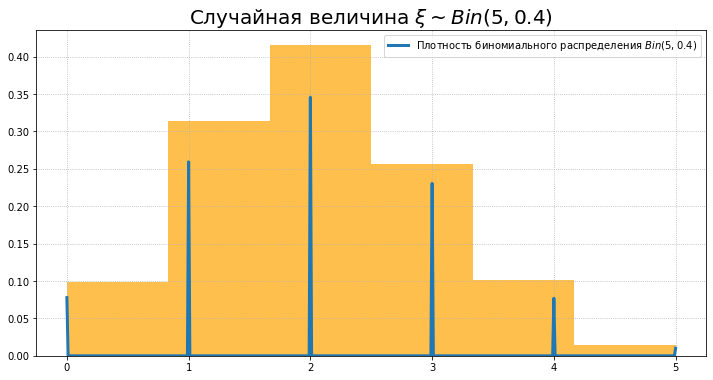

In [284]:
size = 500
p = 0.4
n = 5
grid = np.linspace(0, n, 100 * n + 1)
sample = sps.binom(n=n, p=p).rvs(size)




plt.figure(figsize = (12, 6))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.binom(n=n,p=p).pmf(grid), lw = 3, label = 'Плотность биномиального распределения $Bin$' + '$({},{})$'.format(n, p))
plt.title(r'Случайная величина $\xi \sim Bin({},{})$'.format(n, p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

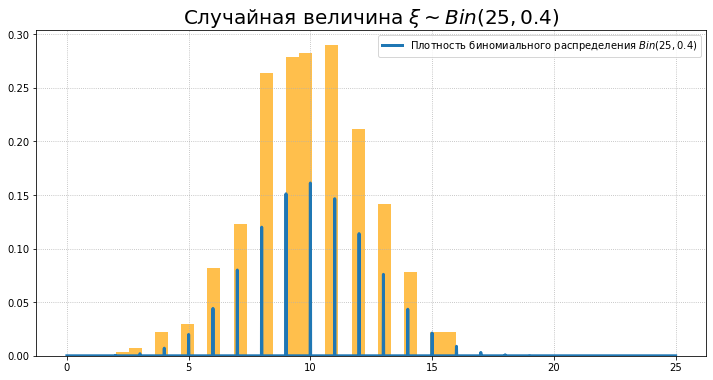

In [285]:
p = 0.4
n = 25
grid = np.linspace(0, n, 100 * n + 1)
sample = sps.binom(n=n, p=p).rvs(size)




plt.figure(figsize = (12, 6))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.binom(n=n,p=p).pmf(grid), lw = 3, label = 'Плотность биномиального распределения $Bin$' + '$({},{})$'.format(n, p))
plt.title(r'Случайная величина $\xi \sim Bin({},{})$'.format(n, p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

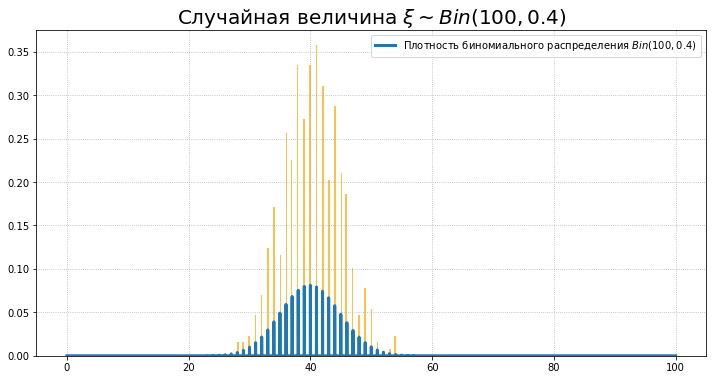

In [286]:
p = 0.4
n = 100
grid = np.linspace(0, n, 100 * n + 1)
sample = sps.binom(n=n, p=p).rvs(size)




plt.figure(figsize = (12, 6))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.binom(n=n,p=p).pmf(grid), lw = 3, label = 'Плотность биномиального распределения $Bin$' + '$({},{})$'.format(n, p))
plt.title(r'Случайная величина $\xi \sim Bin({},{})$'.format(n, p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

* Вывод:
Параметр $n$ при фиксированном $p$ не меняет график, он отвечает скорее за его "масштаб". То есть график выглядит точно таким же, но меняется диапозон значений.

**Дискретное равномерное на отрезке $[a, b]$:**
В качестве параметров даются числа $a$ как начало отрезка и длина отрезка $b - a$. Пусть длина зафиксирована, будем менять $a$. 
Поскольку в условиях дано дискретное равномерное распределение, то мы не можем пользоваться `uniform`, поэтому в роли дискретного равномерного распределения можно пользоваться `randint`.

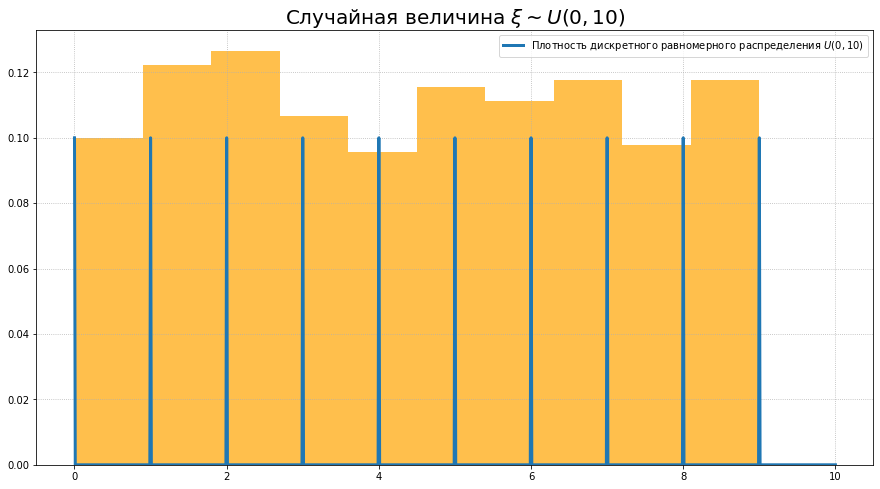

In [289]:
size = 500
a = 0
scale = 10
grid = np.linspace(a, a + scale, 1001)
sample = sps.randint(low = a, high = a + scale).rvs(size)


plt.figure(figsize = (15, 8))
plt.hist(sample, bins = scale, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.randint(low = a, high = a + scale).pmf(grid), lw = 3, label = 'Плотность дискретного равномерного распределения $U$' + '$({},{})$'.format(a, scale))
plt.title(r'Случайная величина $\xi \sim U({},{})$'.format(a, scale), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

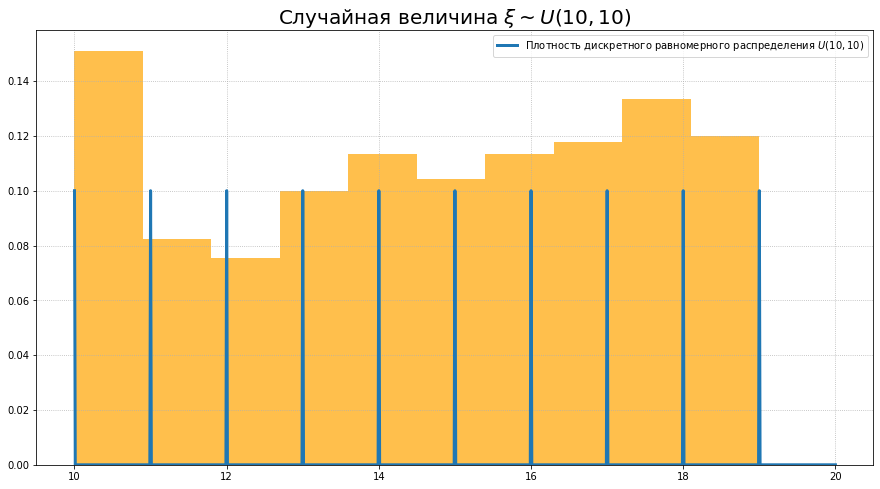

In [290]:
a = 10
grid = np.linspace(a, a + scale, 1001)
sample = sps.randint(low = a, high = a + scale).rvs(size)


plt.figure(figsize = (15, 8))
plt.hist(sample, bins = scale, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.randint(low = a, high = a + scale).pmf(grid), lw = 3, label = 'Плотность дискретного равномерного распределения $U$' + '$({},{})$'.format(a, scale))
plt.title(r'Случайная величина $\xi \sim U({},{})$'.format(a, scale), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

* Вывод: Параметр $a$ определяет лишь начало отрезка, то отвечает за смещение графика вдоль оси $Ox$. Теперь будем менять длину.

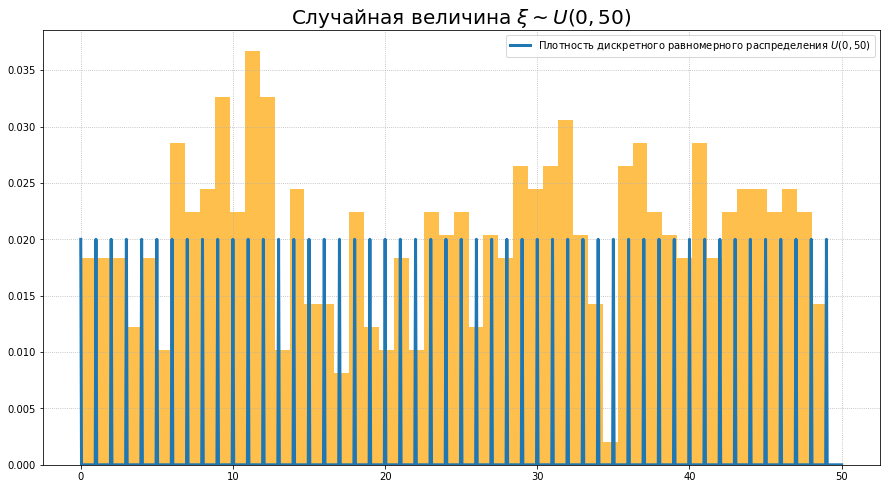

In [292]:
a = 0
scale = 50
grid = np.linspace(a, a + scale, 1001)
sample = sps.randint(low = a, high = a + scale).rvs(size)


plt.figure(figsize = (15, 8))
plt.hist(sample, bins = scale, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.randint(low = a, high = a + scale).pmf(grid), lw = 3, label = 'Плотность дискретного равномерного распределения $U$' + '$({},{})$'.format(a, scale))
plt.title(r'Случайная величина $\xi \sim U({},{})$'.format(a, scale), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

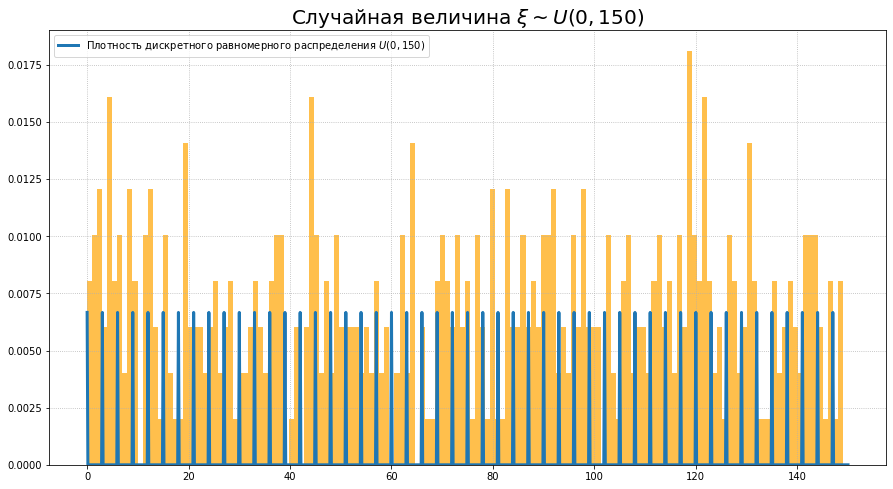

In [295]:
scale = 150
grid = np.linspace(a, a + scale, 1001)
sample = sps.randint(low = a, high = a + scale).rvs(size)


plt.figure(figsize = (15, 8))
plt.hist(sample, bins = scale, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.randint(low = a, high = a + scale).pmf(grid), lw = 3, label = 'Плотность дискретного равномерного распределения $U$' + '$({},{})$'.format(a, scale))
plt.title(r'Случайная величина $\xi \sim U({},{})$'.format(a, scale), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

* Вывод: Плотность распределения на данном отрезке уменьшается с ростом данного параметра длины. Это логично, поскольку сумма плотностей по всем точкам постоянна и равна единице.

**Геометрическое распределение:**
    Единственным параметром является $p$, а случайная величина неограничена, но тем не менее мы будем строить график лишь для ограниченного отрезка.

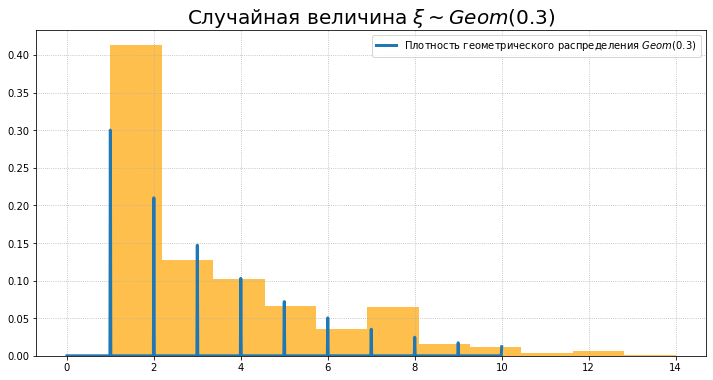

In [303]:
size = 500
n = 10
grid = np.linspace(0, 10, 100 * n + 1)
p = 0.3
sample = sps.geom(p).rvs(size)




plt.figure(figsize = (12, 6))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.geom(p).pmf(grid), lw = 3, label = 'Плотность геометрического распределения $Geom$' + '$({})$'.format(p))
plt.title(r'Случайная величина $\xi \sim Geom({})$'.format(p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

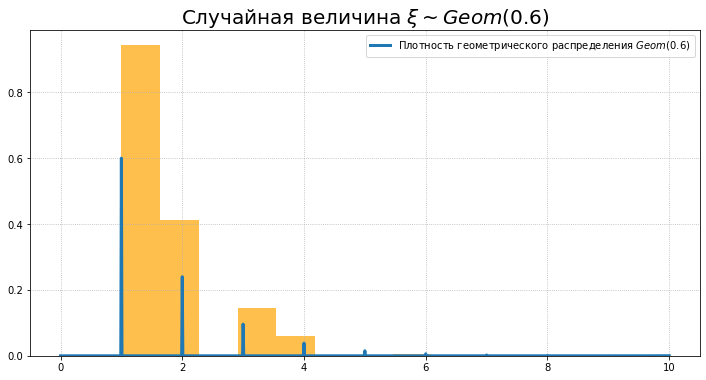

In [304]:
p = 0.6
sample = sps.geom(p).rvs(size)




plt.figure(figsize = (12, 6))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.geom(p).pmf(grid), lw = 3, label = 'Плотность геометрического распределения $Geom$' + '$({})$'.format(p))
plt.title(r'Случайная величина $\xi \sim Geom({})$'.format(p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

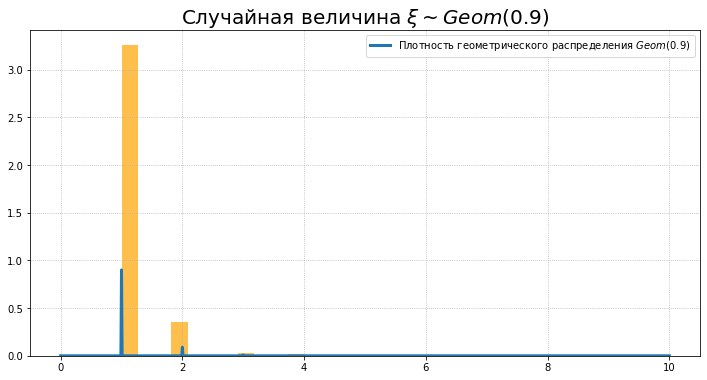

In [305]:
p = 0.9
sample = sps.geom(p).rvs(size)




plt.figure(figsize = (12, 6))
plt.hist(sample, bins = n + 1, density = True, alpha = 0.7, color = 'orange')
plt.plot(grid, sps.geom(p).pmf(grid), lw = 3, label = 'Плотность геометрического распределения $Geom$' + '$({})$'.format(p))
plt.title(r'Случайная величина $\xi \sim Geom({})$'.format(p), fontsize=20)
plt.legend()
plt.grid(ls=':')
plt.show()

* Вывод: с ростом вероятности успеха $p$ график "смещается" визуально левее. Это логично, поскольку случайная величина геом. распределения - это первый успех в схеме Бернулли. Соответственно, чем больше вероятность успеха, тем скорее мы его добьемся.